In [33]:
import scanpy as sc
import pycisTopic
from pycisTopic.cistopic_class import *
import pickle
import os

In [4]:
adata = sc.read_h5ad("/data1st2/junyi/output/atac0416/subset/region_nt/AMY_AMY_Glut.h5ad")

In [27]:
gene_peak_matrix = adata.layers['count'].T.tocsr()
#gene_peak_matrix = adata.X.T.tocsr()

In [6]:
cell_data = adata.obs
gene_data = adata.var

In [8]:
type(gene_peak_matrix)

scipy.sparse._csr.csr_matrix

In [28]:
pycis_topic_obj = create_cistopic_object(
    fragment_matrix=gene_peak_matrix,
    cell_names=cell_data.index.tolist(),
    region_names=gene_data.index.tolist()
)


2025-06-03 10:30:01,191 cisTopic     INFO     Creating CistopicObject
2025-06-03 10:30:06,582 cisTopic     INFO     Done!


In [ ]:
# import pickle
# import os
# out_dir = "/data1st2/junyi/output/atac0416/cistopic"
# pickle.dump(
#     pycis_topic_obj,
#     open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
# )


SyntaxError: invalid syntax (10356858.py, line 2)

In [29]:
pycis_topic_obj.add_cell_data(cell_data, split_pattern='__')

In [30]:
pycis_topic_obj.add_region_data(gene_data)

In [45]:
pycis_topic_obj.cell_data['ACC:celltype.L2']= pycis_topic_obj.cell_data['celltype.L2'].astype('category')

In [46]:
pickle.dump(
    pycis_topic_obj,
    open(os.path.join('/data1st2/junyi/output/atac0416/cistopic', "cistopic_AMY_AMY_Glut.pkl"), "wb")
)


In [48]:
adata_sc = sc.read_h5ad("/data1st1/hydata/SN_neuron_after_int_filter_anno.h5ad")

OSError: [Errno 5] Can't synchronously read data (file read failed: time = Tue Jun  3 15:49:43 2025
, filename = '/data1st1/hydata/SN_neuron_after_int_filter_anno.h5ad', file descriptor = 72, errno = 5, error message = 'Input/output error', buf = 0x578987dc, total read size = 2928, bytes this sub-read = 2928, bytes actually read = 18446744073709551615, offset = 0)

In [34]:
os.environ['MALLET_MEMORY'] = '200G'


In [37]:
from pycisTopic.lda_models import run_cgs_models_mallet
mallet_path="/home/junyichen/Mallet-202108/bin/mallet"


In [39]:
models=run_cgs_models_mallet(
    pycis_topic_obj,
    n_topics=[10,20],
    n_cpu=64,
    n_iter=500,
    random_state=555,
    alpha=50,
    alpha_by_topic=True,
    eta=0.1,
    eta_by_topic=False,
    tmp_path="/data1st2/junyi/tmp",
    save_path="/data1st2/junyi/tmp/cistopic_models",
    mallet_path=mallet_path,
)


2025-06-03 10:39:34,820 cisTopic     INFO     Formatting input to corpus
2025-06-03 10:39:37,296 cisTopic     INFO     Running model with 10 topics
2025-06-03 10:39:37,297 LDAMalletWrapper INFO     Serializing temporary corpus to /data1st2/junyi/tmp/corpus.txt
2025-06-03 10:41:28,146 LDAMalletWrapper INFO     Converting temporary corpus to MALLET format with: /home/junyichen/Mallet-202108/bin/mallet import-file --preserve-case --keep-sequence --token-regex \S+ --input /data1st2/junyi/tmp/corpus.txt --output /data1st2/junyi/tmp/corpus.mallet
2025-06-03 10:44:45,427 LDAMalletWrapper INFO     Training MALLET LDA with: /home/junyichen/Mallet-202108/bin/mallet train-topics --input /data1st2/junyi/tmp/corpus.mallet --num-topics 10 --alpha 50 --beta 0.1 --optimize-interval 0 --num-threads 12 --output-state /data1st2/junyi/tmp/6ddf83_state.mallet.gz --output-doc-topics /data1st2/junyi/tmp/6ddf83_doctopics.txt --output-topic-keys /data1st2/junyi/tmp/6ddf83_topickeys.txt --num-iterations 500 --i

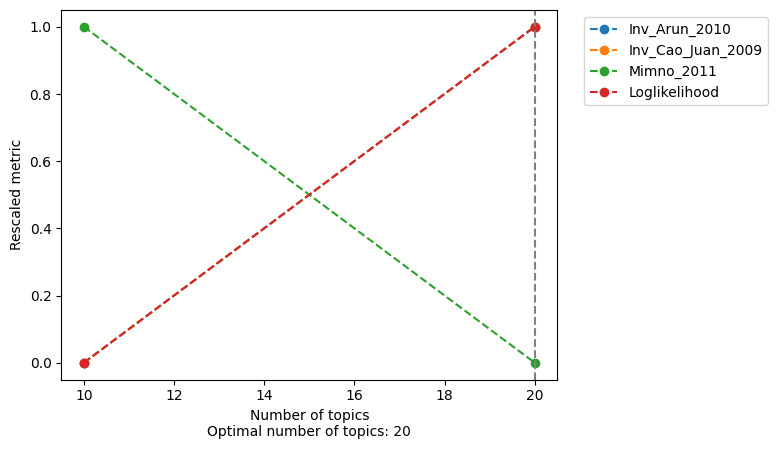

In [41]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    select_model = 20,
    return_model = True
)


In [42]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)
